<a href="https://colab.research.google.com/github/ben8169/Project/blob/main/3%EC%B0%A8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install tfds-korean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# !pip install tensorflow==2.0.0

In [5]:
import tensorflow_datasets as tfds
import tfds_korean.nsmc

dataset = tfds.load("nsmc")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/nsmc/1.0.0.incompleteKDG9UR/nsmc-train.tfrecord*...:   0%|          | 0/15…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/nsmc/1.0.0.incompleteKDG9UR/nsmc-test.tfrecord*...:   0%|          | 0/500…

Dataset nsmc downloaded and prepared to /root/tensorflow_datasets/nsmc/1.0.0. Subsequent calls will reuse this data.


In [6]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_test.txt")


('ratings_test.txt', <http.client.HTTPMessage at 0x7f925cb20fd0>)

In [7]:
import pandas as pd
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')


In [8]:
train_data.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [9]:
test_data.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [11]:
train_data = train_data.dropna(how='any')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [12]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [13]:
train_data.drop_duplicates(subset=['document'], inplace = True)
print(f'학습 데이터셋의 데이터 수 :{len(train_data)}')

학습 데이터셋의 데이터 수 :146182


<Axes: >

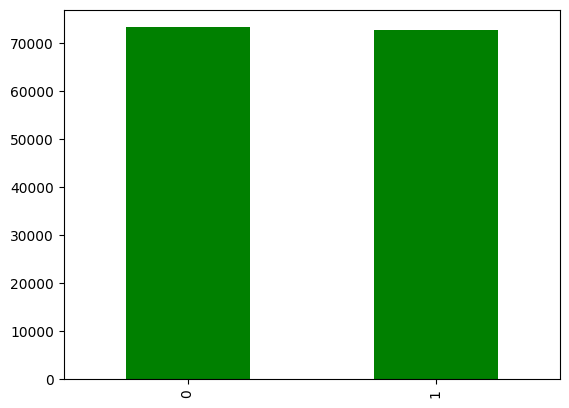

In [14]:
train_data['label'].value_counts().plot(kind='bar', color='green')

In [15]:
train_data.groupby('label').size()

label
0    73342
1    72840
dtype: int64

In [16]:
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

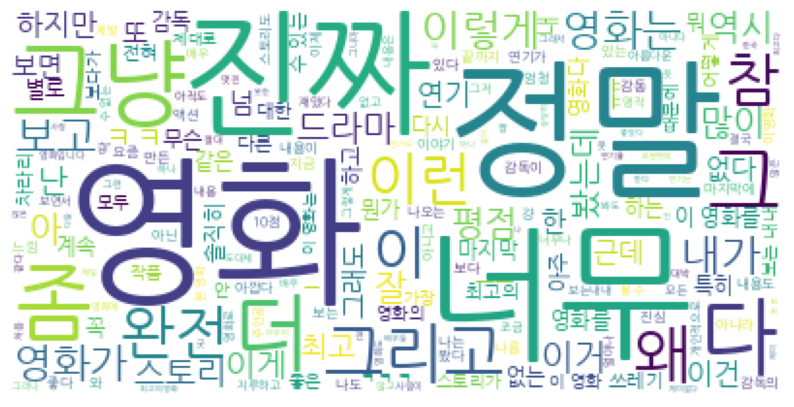

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='NanumGothic', background_color='white')
x = wordcloud.generate(''.join(train_review))

plt.figure(figsize=(10,8))
plt.imshow(x)
plt.axis('off')
plt.show()


In [18]:
from konlpy.tag import Okt
import re

stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한','을']
okt = Okt()

clean_train_review = []

for review in train_data['document']:
  if type(review) == str:
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
    word_review = okt.morphs(review_text, stem=True)
    word_review = [token for token in word_review if not token in stop_words]
    clean_train_review.append(word_review)
  else:
    clean_train_review.append([])

clean_train_review[:11]


[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '하다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다'],
 ['막',
  '걸음',
  '마',
  '떼다',
  '세',
  '부터',
  '초등학교',
  '학년',
  '생인',
  '살다',
  '영화',
  'ㅋㅋㅋ',
  '별',
  '반개',
  '도',
  '아깝다',
  '움'],
 ['원작', '긴장감', '제대로', '살리다', '하다'],
 ['별',
  '반개',
  '도',
  '아깝다',
  '욕',
  '나오다',
  '이응경',
  '길용우',
  '연',
  '기',
  '생활',
  '몇',
  '년',
  '인지',
  '정말',
  '발',
  '로',
  '해도',
  '그것',
  '보단',
  '낫다',
  '납치',
  '감금',
  '만',
  '반복',
  '반복',
  '드라마',
  '가족',
  '도',
  '없다',
  '연기',
  '못',
  '하다',
  '사람',
  '만',
  '모',
  '엿',
  '네'],
 ['액션', '없다', '재미', '있다', '몇', '안되다', '영화'],
 ['왜케',
  '평점',
  '낮다',
  '꽤',
  '볼',
  '만',
  '데',
  '헐리우드',
  '식',
  '화려하다',
  '너무',
  '길들이다',
  '있다'],
 ['걍', '인피니트', '짱', '이다', '진짜'

In [19]:
clean_test_review = []

for review in test_data['document']:
  if type(review) == str:
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
    word_review = okt.morphs(review_text, stem=True)
    word_review = [token for token in word_review if not token in stop_words]
    clean_test_review.append(word_review)
  else:
    clean_test_review.append([])

clean_test_review[:11]


[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '하다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다'],
 ['막',
  '걸음',
  '마',
  '떼다',
  '세',
  '부터',
  '초등학교',
  '학년',
  '생인',
  '살다',
  '영화',
  'ㅋㅋㅋ',
  '별',
  '반개',
  '도',
  '아깝다',
  '움'],
 ['원작', '긴장감', '제대로', '살리다', '하다'],
 ['별',
  '반개',
  '도',
  '아깝다',
  '욕',
  '나오다',
  '이응경',
  '길용우',
  '연',
  '기',
  '생활',
  '몇',
  '년',
  '인지',
  '정말',
  '발',
  '로',
  '해도',
  '그것',
  '보단',
  '낫다',
  '납치',
  '감금',
  '만',
  '반복',
  '반복',
  '드라마',
  '가족',
  '도',
  '없다',
  '연기',
  '못',
  '하다',
  '사람',
  '만',
  '모',
  '엿',
  '네'],
 ['액션', '없다', '재미', '있다', '몇', '안되다', '영화'],
 ['왜케',
  '평점',
  '낮다',
  '꽤',
  '볼',
  '만',
  '데',
  '헐리우드',
  '식',
  '화려하다',
  '너무',
  '길들이다',
  '있다'],
 ['걍', '인피니트', '짱', '이다', '진짜'

In [20]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab =tokenizer.word_index

train_inputs = pad_sequences(train_sequences, maxlen=8, padding='post')

train_labels = np.array(train_data['label'])

test_inputs = pad_sequences(test_sequences, maxlen=8, padding='post')

test_labels = np.array(test_data['label'])

word_vocab

{'영화': 1,
 '보다': 2,
 '하다': 3,
 '에': 4,
 '도': 5,
 '를': 6,
 '없다': 7,
 '이다': 8,
 '있다': 9,
 '좋다': 10,
 '너무': 11,
 '다': 12,
 '정말': 13,
 '되다': 14,
 '재밌다': 15,
 '적': 16,
 '만': 17,
 '같다': 18,
 '진짜': 19,
 '으로': 20,
 '로': 21,
 '아니다': 22,
 '않다': 23,
 '점': 24,
 '에서': 25,
 '만들다': 26,
 '과': 27,
 '나오다': 28,
 '연기': 29,
 '평점': 30,
 '내': 31,
 '최고': 32,
 '그': 33,
 '나': 34,
 '안': 35,
 '인': 36,
 '스토리': 37,
 '생각': 38,
 '못': 39,
 '왜': 40,
 '드라마': 41,
 '게': 42,
 '감동': 43,
 '사람': 44,
 '보고': 45,
 '이렇다': 46,
 '말': 47,
 '고': 48,
 '아깝다': 49,
 '더': 50,
 '배우': 51,
 '때': 52,
 'ㅋㅋ': 53,
 '와': 54,
 '감독': 55,
 '거': 56,
 '그냥': 57,
 '재미있다': 58,
 '요': 59,
 '재미': 60,
 '시간': 61,
 '내용': 62,
 '뭐': 63,
 '까지': 64,
 '중': 65,
 '주다': 66,
 '좀': 67,
 '자다': 68,
 '하고': 69,
 '지루하다': 70,
 '재미없다': 71,
 '쓰레기': 72,
 '네': 73,
 '모르다': 74,
 '가다': 75,
 '들다': 76,
 '그렇다': 77,
 '싶다': 78,
 '지': 79,
 '작품': 80,
 '사랑': 81,
 '알다': 82,
 '하나': 83,
 '다시': 84,
 '마지막': 85,
 '볼': 86,
 '잘': 87,
 '이건': 88,
 '정도': 89,
 '저': 90,
 '완전': 91,
 '오다': 92,
 'ㅋ': 93,
 

In [22]:
DEFAULT_PATH = '/content/'
DATA_PATH = 'CLEAN_DATA/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1


import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH + DATA_PATH)


np.save(open(DEFAULT_PATH + DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH + DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)

np.save(open(DEFAULT_PATH + DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH + DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

import json
json.dump(data_configs,open(DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

In [23]:
DATA_PATH = '/content/CLEAN_DATA/'
DATA_OUT = '/content/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input, maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH + DATA_CONFIGS,'r'))

In [45]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 100
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name':model_name, 'vocab_size':prepro_configs['vocab_size'], 'embedding_size':128,
       'num_filters':100, 'dropout_rate':0.5, 'hidden_dimension':250, 'output_dimension':1}

In [46]:
import tensorflow as tf
from tensorflow.keras import layers

class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embedding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',
                                                  activation = tf.keras.activations.relu,
                                                  kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) \
                      for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation = tf.keras.activations.sigmoid,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1) 
    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [47]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [51]:
model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience = 2)
checkpoint_path = DATA_OUT + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print(f"{checkpoint_dir} -- folder already exists\n")
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print(f"{checkpoint_dir} -- folder create complete\n")

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

/content/DATA_OUT/cnn_classifier_kr -- folder already exists

Epoch 1/100
253/257 [============================>.] - ETA: 0s - loss: 0.4624 - accuracy: 0.7753
Epoch 1: val_accuracy improved from -inf to 0.81948, saving model to /content/DATA_OUT/cnn_classifier_kr/weights.h5
257/257 [==============================] - 23s 82ms/step - loss: 0.4614 - accuracy: 0.7760 - val_loss: 0.3954 - val_accuracy: 0.8195
Epoch 2/100
256/257 [============================>.] - ETA: 0s - loss: 0.3530 - accuracy: 0.8460
Epoch 2: val_accuracy improved from 0.81948 to 0.83029, saving model to /content/DATA_OUT/cnn_classifier_kr/weights.h5
257/257 [==============================] - 6s 22ms/step - loss: 0.3530 - accuracy: 0.8460 - val_loss: 0.3828 - val_accuracy: 0.8303
Epoch 3/100
252/257 [============================>.] - ETA: 0s - loss: 0.3005 - accuracy: 0.8731
Epoch 3: val_accuracy did not improve from 0.83029
257/257 [==============================] - 5s 21ms/step - loss: 0.3008 - accuracy: 0.8730 - val_

In [52]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = '/content/DATA_OUT/cnn_classifier_kr/weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TRAIN_DATA, 'rb'))

model.load_weights(SAVE_FILE_NM)
# model.evaluate(test_input, test_label_data)
model.evaluate(test_input[:146182], test_label_data[:146182])

4569/4569 [==============================] - 13s 3ms/step - loss: 1.3672 - accuracy: 0.5024


[1.3671704530715942, 0.5024011135101318]

In [75]:
okt = Okt()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('/content/CLEAN_DATA/'+DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)


MAX_LENGTH = 20
for i in ['오류 좀 그만 떠라 짜증난다',' 너무 기뻐요', '드디어 보고서 완성!!','너무 힘들었다']:
  sentence = i
  print(sentence)
  sentence = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',sentence)

  stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한','을']
  sentence = okt.morphs(sentence, stem=True)
  sentence = [word for word in sentence if not word in stop_words]
  vector = tokenizer.texts_to_sequences(sentence)
  pad_new = pad_sequences(vector, maxlen = MAX_LENGTH)

  model.load_weights(SAVE_FILE_NM)
  predictions = model.predict(pad_new)
  predictions = float(predictions.squeeze(-1)[1])
  print(predictions)


  if predictions > 0.5:
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(predictions *100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1-predictions) *100))


오류 좀 그만 떠라 짜증난다
1/1 [==============================] - 0s 180ms/step
0.21346688270568848
78.65% 확률로 부정 리뷰입니다.

 너무 기뻐요
1/1 [==============================] - 0s 51ms/step
0.8780035972595215
87.80% 확률로 긍정 리뷰입니다.

드디어 보고서 완성!!
1/1 [==============================] - 0s 85ms/step
0.8841283321380615
88.41% 확률로 긍정 리뷰입니다.

너무 힘들었다
1/1 [==============================] - 0s 68ms/step
0.19167116284370422
80.83% 확률로 부정 리뷰입니다.

